### Exercise 11.3
  
For this excercise has been extended the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2) + \eta $ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$ with noise $\eta$ setted equal to 0.1. The number of variables is now incremented from 1 to 2 and it has been decided to use a more numerous training set composed by $10^4$ points and to use a more numerous vaildation test composed by $10^3$ values.

Initially, has been used a neural network similar in the form to the excercise 11.2. A NN like 1,4,8,32,64,28,64,32,8,4,1, but did not perform well. Indeed has been used a neural network with a numerous first layer, and than layers decreasing in the numbers of neurons: 128,64,32,8,4,2,1. A NN like this provides 11033 parameters. 

The activations function chosen is the **relu** for every layer, apart the output layer that uses **tanh**. The codomain of the function that must be forcasted has the same codomain of **tanh**, indeed the choice comes naturally from the proprety of the function that must be predicted.

The loss function used is **MSE**, the optimizator chosen is the **SGD** and the machine has been trained for 50 epochs.

In [1]:
import numpy as np

# generate training inputs
np.random.seed(0)
n_train = 10000
n_valid = 1000
x_train = np.zeros((n_train, 2))
y_train = np.zeros((n_train))
x_train[:,0] = np.random.uniform(-1.5, 1.5, n_train)
x_train[:,1] = np.random.uniform(-1.5, 1.5, n_train)

x_valid = np.zeros((n_valid, 2))
x_valid[:,0] = np.random.uniform(-1.5, 1.5, n_valid)
x_valid[:,1] = np.random.uniform(-1.5, 1.5, n_valid)
#x_valid.sort()
#y_target = np.zeros((n_valid))
y_target = np.sin(x_valid[:,0]**2+x_valid[:,1]**2) # ideal (target) linear function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(np.sin(x_train[:,0]**2+x_train[:,1]**2), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(np.sin(x_valid[:,0]**2+x_valid[:,1]**2), sigma)

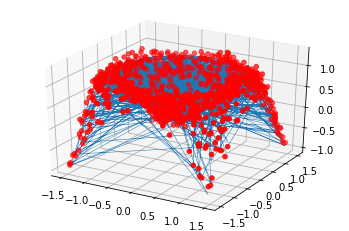

In [2]:
# plot training and target dataset
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(x_valid[:,0], x_valid[:,1], y_target, lw=0.5)
ax.scatter(x_valid[:,0], x_valid[:,1], y_valid,c='red')
plt.grid(True); plt.show()

In [3]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras import optimizers, losses, metrics

model = tf.keras.Sequential()
model.add(Dense(128, input_shape=(2,),activation='relu'))
model.add(Dense(64, input_shape=(2,),activation='relu'))
model.add(Dense(32, input_shape=(2,),activation='relu'))
model.add(Dense(8, input_shape=(2,),activation='relu'))
model.add(Dense(4, input_shape=(2,),activation='relu'))
model.add(Dense(2, input_shape=(2,),activation='relu'))
model.add(Dense(1, input_shape=(2,),activation='tanh'))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
#model.compile(optimizer='sgd', loss=losses.categorical_crossentropy, metrics=['mse'])
#from tensorflow.keras import optimizers, losses, metrics

# Configure the model for mean-squared error regression.
#model.compile(optimizer=optimizers.SGD(),             #optimizer='sgd',       # stochastic gradient descent
              #loss=losses.categorical_crossentropy,
              #metrics=[metrics.categorical_accuracy]) #metrics=['accuracy'])  # an optional list of metrics

In [4]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3

In [5]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1647 - mse: 0.1647 - val_loss: 0.1458 - val_mse: 0.1458
Epoch 2/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1498 - mse: 0.1498 - val_loss: 0.1359 - val_mse: 0.1359
Epoch 3/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1394 - mse: 0.1394 - val_loss: 0.1230 - val_mse: 0.1230
Epoch 4/50
313/313 [==============================] - 1s 3ms/step - loss: 0.1210 - mse: 0.1210 - val_loss: 0.1022 - val_mse: 0.1022
Epoch 5/50
313/313 [==============================] - 1s 3ms/step - loss: 0.0905 - mse: 0.0905 - val_loss: 0.0680 - val_mse: 0.0680
Epoch 6/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0554 - mse: 0.0554 - val_loss: 0.0414 - val_mse: 0.0414
Epoch 7/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0276 - val_mse: 0.0276
Epoch 8/50
313/313 [==============================] - 1s 2ms/step - loss: 0.

In [6]:
for l in model.layers:
    w = l.get_weights()
    print("layer nodes weights: ", w[0].shape)
    print("layer bias weights: ", w[1].shape)

layer nodes weights:  (2, 128)
layer bias weights:  (128,)
layer nodes weights:  (128, 64)
layer bias weights:  (64,)
layer nodes weights:  (64, 32)
layer bias weights:  (32,)
layer nodes weights:  (32, 8)
layer bias weights:  (8,)
layer nodes weights:  (8, 4)
layer bias weights:  (4,)
layer nodes weights:  (4, 2)
layer bias weights:  (2,)
layer nodes weights:  (2, 1)
layer bias weights:  (1,)


32/32 [==============================] - 0s 1ms/step - loss: 0.0109 - mse: 0.0109

Test loss: 0.010926195420324802
Test accuracy: 0.010926195420324802


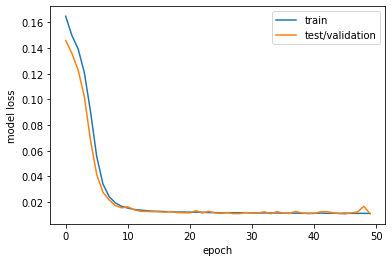

In [7]:
#model.evaluate(x_valid, y_valid, batch_size=32)
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test/validation'], loc='best')
plt.show()

In [8]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 1ms/step - loss: 0.0109 - mse: 0.0109

Test loss: 0.010926195420324802
Test accuracy: 0.010926195420324802


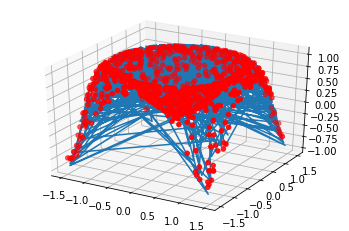

In [9]:
n_predicted=1000
x_predicted=np.zeros((n_predicted,2))
x_predicted[:,0] = np.random.uniform(-1.5, 1.5, n_predicted)
x_predicted[:,1] = np.random.uniform(-1.5, 1.5, n_predicted)
y_predicted = model.predict(x_predicted)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x_valid[:,0],x_valid[:,1], y_target)
ax.scatter(x_predicted[:,0], x_predicted[:,1], y_predicted,c='red')
plt.grid(True); plt.show()

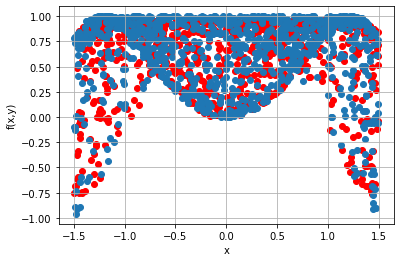

In [12]:
plt.scatter(x_predicted[:,0], y_predicted,color='r')
plt.scatter(x_valid[:,0],y_target)
plt.xlabel("x")
plt.ylabel("f(x,y)")
plt.grid(True)
plt.show()

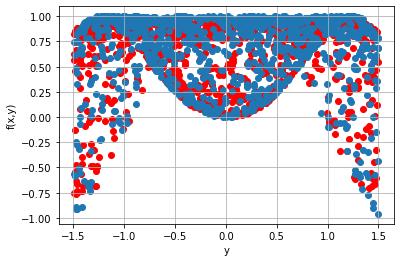

In [13]:
plt.scatter(x_predicted[:,1], y_predicted,color='r')
plt.scatter(x_valid[:,1],y_target)
plt.xlabel("y")
plt.ylabel("f(x,y)")
plt.grid(True)
plt.show()

### what does happen if the activation function of the output's neuron get changed?

Let's try with a **RELU**

In [211]:
import numpy as np

# generate training inputs
np.random.seed(0)
n_train = 10000
n_valid = 1000
x_train = np.zeros((n_train, 2))
y_train = np.zeros((n_train))
x_train[:,0] = np.random.uniform(-1.5, 1.5, n_train)
x_train[:,1] = np.random.uniform(-1.5, 1.5, n_train)

x_valid = np.zeros((n_valid, 2))
x_valid[:,0] = np.random.uniform(-1.5, 1.5, n_valid)
x_valid[:,1] = np.random.uniform(-1.5, 1.5, n_valid)
#x_valid.sort()
#y_target = np.zeros((n_valid))
y_target = np.sin(x_valid[:,0]**2+x_valid[:,1]**2) # ideal (target) linear function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(np.sin(x_train[:,0]**2+x_train[:,1]**2), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(np.sin(x_valid[:,0]**2+x_valid[:,1]**2), sigma)

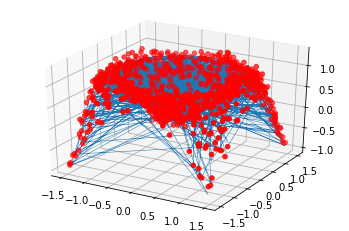

In [212]:
# plot training and target dataset
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(x_valid[:,0], x_valid[:,1], y_target, lw=0.5)
ax.scatter(x_valid[:,0], x_valid[:,1], y_valid,c='red')
plt.grid(True); plt.show()

In [213]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras import optimizers, losses, metrics

model = tf.keras.Sequential()
model.add(Dense(128, input_shape=(2,),activation='relu'))
model.add(Dense(64, input_shape=(2,),activation='relu'))
model.add(Dense(32, input_shape=(2,),activation='relu'))
model.add(Dense(8, input_shape=(2,),activation='relu'))
model.add(Dense(4, input_shape=(2,),activation='relu'))
model.add(Dense(2, input_shape=(2,),activation='relu'))
model.add(Dense(1, input_shape=(2,),activation='tanh'))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
#model.compile(optimizer='sgd', loss=losses.categorical_crossentropy, metrics=['mse'])
#from tensorflow.keras import optimizers, losses, metrics

# Configure the model for mean-squared error regression.
#model.compile(optimizer=optimizers.SGD(),             #optimizer='sgd',       # stochastic gradient descent
              #loss=losses.categorical_crossentropy,
              #metrics=[metrics.categorical_accuracy]) #metrics=['accuracy'])  # an optional list of metrics

In [214]:
# get a summary of our composed model
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_255 (Dense)            (None, 128)               384       
_________________________________________________________________
dense_256 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_257 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_258 (Dense)            (None, 8)                 264       
_________________________________________________________________
dense_259 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_260 (Dense)            (None, 2)                 10        
_________________________________________________________________
dense_261 (Dense)            (None, 1)               

In [215]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1989 - mse: 0.1989 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 2/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1633 - mse: 0.1633 - val_loss: 0.1571 - val_mse: 0.1571
Epoch 3/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1633 - mse: 0.1633 - val_loss: 0.1570 - val_mse: 0.1570
Epoch 4/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1633 - mse: 0.1633 - val_loss: 0.1572 - val_mse: 0.1572
Epoch 5/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1633 - mse: 0.1633 - val_loss: 0.1570 - val_mse: 0.1570
Epoch 6/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1633 - mse: 0.1633 - val_loss: 0.1571 - val_mse: 0.1571
Epoch 7/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1633 - mse: 0.1633 - val_loss: 0.1573 - val_mse: 0.1573
Epoch 8/50
313/313 [==============================] - 1s 2ms/step - loss: 0.

32/32 [==============================] - 0s 1ms/step - loss: 0.1573 - mse: 0.1573

Test loss: 0.1572699248790741
Test accuracy: 0.1572699248790741


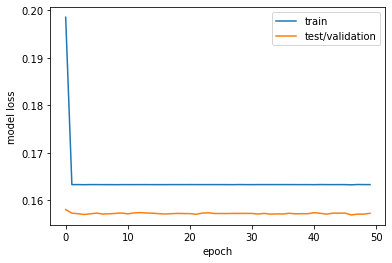

In [196]:
#model.evaluate(x_valid, y_valid, batch_size=32)
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test/validation'], loc='best')
plt.show()

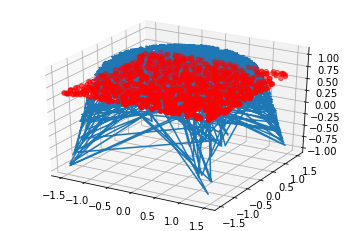

In [197]:
n_predicted=1000
x_predicted=np.zeros((n_predicted,2))
x_predicted[:,0] = np.random.uniform(-1.5, 1.5, n_predicted)
x_predicted[:,1] = np.random.uniform(-1.5, 1.5, n_predicted)
y_predicted = model.predict(x_predicted)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x_valid[:,0],x_valid[:,1], y_target)
ax.scatter(x_predicted[:,0], x_predicted[:,1], y_predicted,c='red')
plt.grid(True); plt.show()

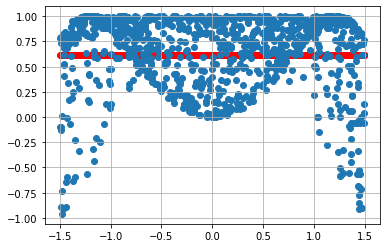

In [198]:
plt.scatter(x_predicted[:,0], y_predicted,color='r')
plt.scatter(x_valid[:,0],y_target)

plt.grid(True)
plt.show()

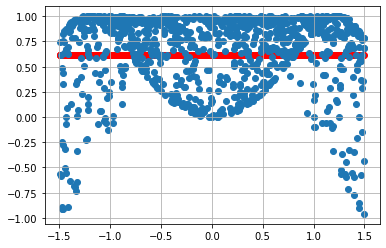

In [199]:
plt.scatter(x_predicted[:,1], y_predicted,color='r')
plt.scatter(x_valid[:,1],y_target)

plt.grid(True)
plt.show()

The problem comes from the characteritics and from the trend of the two functions. 
As it can be seen from the images below, the **RELU** has only positives values, indeed if it is wanted to rapresent a function with negatives values, **RELU** must not be considered. On the other hand, the **TANH** activation function shares the same values of codomain with the function that must be fitted. Indeed is the perfect choice for the activation function of the output's neuron.

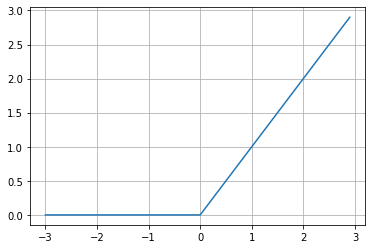

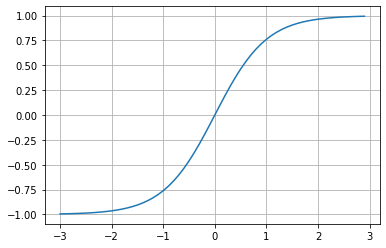

In [222]:
x = np.arange(-3, 3, 0.1)
from tensorflow.keras import backend, activations
plt.plot(x, backend.get_value(activations.relu(x, alpha=0.0, max_value=None) )) # default
plt.grid(True)
plt.show()
plt.plot(x, backend.get_value(activations.tanh(x) )) # default
plt.grid(True)
plt.show()